## Imports

In [1]:
import pandas as pd
import sqlite3

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [3]:
request = '''
SELECT uid, datetime 
FROM pageviews
WHERE uid LIKE 'user_%'
'''
views = pd.io.sql.read_sql(request, connect, parse_dates=['datetime'])
views

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


In [4]:
request = '''
SELECT uid, timestamp 
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(request, connect, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## analyze only the dates when there were both views and checker commits

In [5]:
views_groupped = views.groupby(by=views['datetime'].dt.date).count()['uid'].reset_index()
views_groupped.columns = ['date', 'views']
views_groupped = views_groupped.set_index('date')
views_groupped

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [6]:
commits_groupped = commits.groupby(by=commits['timestamp'].dt.date).count()['uid'].reset_index()
commits_groupped.columns = ['date', 'commits']
commits_groupped = commits_groupped.set_index('date')
commits_groupped

,commits
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


In [7]:
views_commits = views_groupped.merge(commits_groupped,
                                     how='inner',
                                     left_on=views_groupped.index,
                                     right_on=commits_groupped.index).set_index('key_0')
views_commits.index = views_commits.index.rename('date')
views_commits

,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


## use size of the font should be 8

## the size of the figure is (15,8)

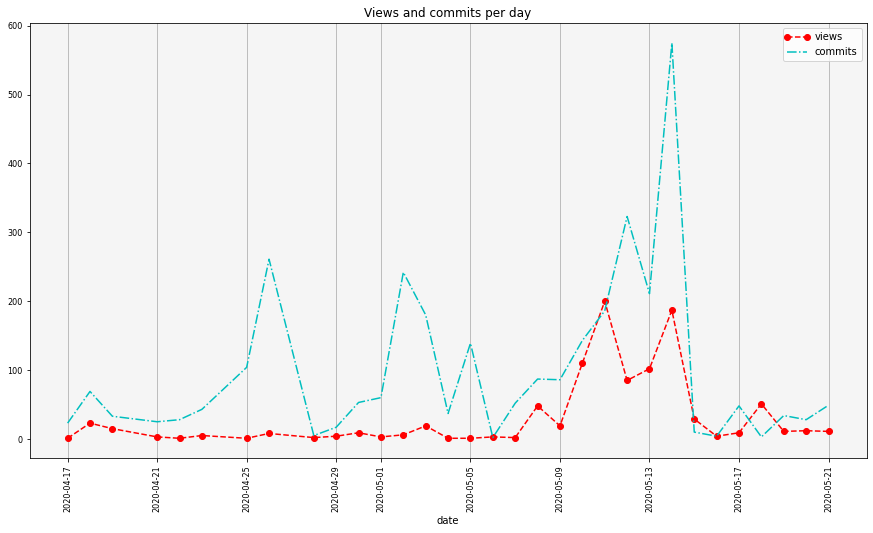

In [8]:
ax = views_commits.plot(fontsize=8,
                        figsize=(15,8),
                        title='Views and commits per day',
                        color=['red', 'c'], style=['--', '-.'], rot=90)
ax.grid(axis='x')
ax.get_lines()[0].set_marker('o')
ax.get_legend().get_lines()[0].set_marker('o')
ax.set_facecolor('#F5F5F5')

## How many times was the number of views larger than 150?

In [9]:
views_commits[views_commits['views'] > 150]['views'].count()

2

## The answer is 2

In [10]:
connect.close()